<a href="https://colab.research.google.com/github/EXXCALIBURXX/nlp-assignment-1/blob/main/Assignment1_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing Assignment 1**

**Assignment Objective** - You have to implement all of these techniques on a small corpus of your own choice taken from the web. Make sure to use the same corpus for all the tasks, also please give the reference of where you chose the corpus from. People attempting for advanced level are recommended to use a larger(production level/real-use) dataset.


## **Text Pre-processing for Natural Language Processing (NLP)**

Text preprocessing in NLP is the process of cleaning and preparing raw text data for analysis by machine learning or deep learning models. It involves converting text into a structured format through various steps. These steps ensure the text is consistent and meaningful, enabling models to better understand and process the data efficiently. Proper preprocessing is essential for improving the performance and accuracy of NLP models. The steps involved in pre-processing which we are going to be looking at in this tutorial are:
1) **Lowercasing**
2) **Removing Punctuations and Special Characrters**
3) **Stop-Words removal**
4) **Removal of URLs**
5) **Removal of HTML Tags**
6) **Stemming**
7) **Lemmatization**
8) **Tokenization**

====================================================================================================

### NLP Dataset Source - https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?resource=download

In [ ]:
%pip install gensim
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

url = "https://raw.githubusercontent.com/EXXCALIBURXX/nlp-assignment-1/refs/heads/main/Sarcasm_Headlines_Dataset_v2.json"
df = pd.read_json(url, lines=True)
data = df.copy()
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


<style>
blue {
  color: skyblue;
}
</style>

## 1) **Lowercasing**
Lowercasing converts all characters in a text to <blue>**lowercase**</blue>. It ensures uniformity by treating words like <blue>**"Dog"**</blue> and <blue>**"dog"**</blue> as the same entity. This is important for many NLP tasks since capitalization usually doesn't change the meaning of words.

Example:\
Input: "Natural Language Processing"\
Output: "natural language processing"

In [ ]:
data['processed_text'] = data['headline'].str.lower()

print("After Lowercasing:")
data[['headline', 'processed_text']].head()

#The headlines are already in lowercase so doesn't matter.

After Lowercasing:


,headline,processed_text
0,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,dem rep. totally nails why congress is falling...,dem rep. totally nails why congress is falling...
2,eat your veggies: 9 deliciously different recipes,eat your veggies: 9 deliciously different recipes
3,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...
4,mother comes pretty close to using word 'strea...,mother comes pretty close to using word 'strea...


<style>
blue {
  color: skyblue;
}
</style>
## 2) **Removing Punctuation & Special Characters**

Punctuation marks (like <blue>**commas**</blue>, <blue>**periods**</blue>, <blue>**dash**</blue> etc.) and special characters (like <blue>**@**</blue>, <blue>**#**</blue>, <blue>**$**</blue>, etc.) are often not meaningful in many NLP tasks. Removing them helps clean the text for better analysis.

Example:\
Input: "Hello! How are you doing @today?"\
Output: "Hello How are you doing today"


In [ ]:
data['processed_text'] = data['processed_text'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text))
data['processed_text'].head()

,processed_text
0,thirtysomething scientists unveil doomsday clo...
1,dem rep totally nails why congress is falling ...
2,eat your veggies deliciously different recipes
3,inclement weather prevents liar from getting t...
4,mother comes pretty close to using word stream...


<style>
blue {
  color: skyblue;
}
</style>
## 3) **Stop - Words Removal**

Stop-words are common words like <blue>**"the"**</blue>, <blue>**"is"**</blue>, <blue>**"in"**</blue>, <blue>**"and"**</blue> that don't contribute significant meaning to the text. Removing them helps reduce the size of the dataset <blue>**without losing important context**</blue>.

Example:\
Input: "This is a sample sentence"\
Output: "sample sentence"

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

data['processed_text'] = data['processed_text'].apply(remove_stopwords)
data['processed_text'].head()

,processed_text
0,thirtysomething scientists unveil doomsday clo...
1,dem rep totally nails congress falling short g...
2,eat veggies deliciously different recipes
3,inclement weather prevents liar getting work
4,mother comes pretty close using word streaming...


<style>
blue {
  color: skyblue;
}
</style>
## 4) **Removal of URLs**

URLs are often <blue>**irrelevant**</blue> in NLP tasks and can add noise to the data. Removing them ensures cleaner text without <blue>**web links**</blue> that don’t contribute to the context.

Example:\
Input: "Check out this link: https://example.com"\
Output: "Check out this link"

<style>
blue {
  color: skyblue;
}
</style>
## 5) **Removal of HTML Tags**

HTML tags are used in web data but are <blue>**unnecessary**</blue> in NLP tasks. <blue>**Stripping**</blue> out HTML tags cleans the text extracted from <blue>**web pages**</blue>.

Example:\
Input: "&lt;p>This is a paragraph.&lt;/p>"\
Output: "This is a paragraph."

In [ ]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

data['processed_text'] = data['processed_text'].apply(remove_urls).apply(remove_html_tags)
data['processed_text'].head()

,processed_text
0,thirtysomething scientists unveil doomsday clo...
1,dem rep totally nails congress falling short g...
2,eat veggies deliciously different recipes
3,inclement weather prevents liar getting work
4,mother comes pretty close using word streaming...


<style>
blue {
  color: skyblue;
}
</style>
## 6) **Stemming**

Stemming reduces a word to its <blue>**base**</blue> or <blue>**root**</blue> form, which might not always be a valid word. The idea is to <blue>**strip**</blue> off <blue>**prefixes**</blue> or <blue>**suffixes**</blue>. It’s a quick and less computationally expensive way of normalizing words. Stemming is preferred when the <blue>**meaning**</blue> of the word is <blue>**not important**</blue> for analysis. for example: <blue>**Spam Detection**</blue>

Example:\
Input: "Playing", "Played", "Plays"\
Output: "Play"

<blue>**Porter stemming**</blue> algorithm is one of the most common stemming algorithms which is basically designed to <blue>**remove**</blue> and <blue>**replace**</blue> well-known <blue>**suffixes**</blue> of English words. Although the Porter Stemming Algorithm was developed for English texts, it can be adapted to different languages. However, it is more effective to use natural language processing tools and algorithms specifically designed for different languages, like the library <blue>**iNLTK**</blue> offers these tools for <blue>**Indic Languages**</blue>. You can find it out here: <blue>**https://github.com/goru001/inltk**</blue>

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="30%" src="https://cdn.botpenguin.com/assets/website/Stemming_53678d43bc.png">
</div>

In [ ]:
stemmer = PorterStemmer()

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

data['stemmed'] = data['processed_text'].apply(stem_text)
data['stemmed'].head()

,stemmed
0,thirtysometh scientist unveil doomsday clock h...
1,dem rep total nail congress fall short gender ...
2,eat veggi delici differ recip
3,inclement weather prevent liar get work
4,mother come pretti close use word stream corre...


<style>
blue {
  color: skyblue;
}
</style>
## 7) **Lemmatization**

Lemmatization is a more advanced technique compared to stemming. It <blue>**reduces**</blue> a word to its <blue>**base form (called a lemma)**</blue> while ensuring the <blue>**output**</blue> is a <blue>**valid word**</blue>. It uses context to determine whether the word is in singular, plural, or tense forms.

Example:\
Input: "Running", "Ran"\
Output: "Run"

In our lemmatization example, we will be using a popular lemmatizer called <blue>**WordNet**</blue> lemmatizer. WordNet is a word association database for English and a useful resource for English lemmatization. A popular lemmatizer used for Hindi is developed by <blue>**JohSnowLabs**</blue> can be found here: <blue>**https://sparknlp.org/2020/07/29/lemma_hi.html**</blue>

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="30%" src="https://cdn.botpenguin.com/assets/website/Lemmatization_5338fc7c3e.png">
</div>

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return ' '.join(lemmatized_tokens)

data['lemmatized'] = data['processed_text'].apply(lemmatize_text)

print("Lemmatized Text vs. Stemmed Text:")
data[['stemmed', 'lemmatized']].head()

Lemmatized Text vs. Stemmed Text:


,stemmed,lemmatized
0,thirtysometh scientist unveil doomsday clock h...,thirtysomething scientists unveil doomsday clo...
1,dem rep total nail congress fall short gender ...,dem rep totally nail congress fall short gende...
2,eat veggi delici differ recip,eat veggies deliciously different recipes
3,inclement weather prevent liar get work,inclement weather prevent liar get work
4,mother come pretti close use word stream corre...,mother come pretty close use word stream corre...


<style>
blue {
  color: skyblue;
}
</style>
## 8) **Tokenization**

Tokenization is the process of <blue>**splitting**</blue> a text into <blue>**individual units**</blue> like words, phrases, or sentences, called <blue>**tokens**</blue>. These tokens form the building blocks for further processing and analysis in NLP tasks.

Example:\
Input: "Congratulations you are almost at the end of this file."\
Output: ["Congratulations", "you", "are", "almost", "at", "the", "end", "of", "this", "file", "."]

There are different methods and libraries available to perform tokenization. <blue>**SpaCy**</blue> and <blue>**Gensim**</blue> are some of the libraries that can be used to accomplish the task.
Tokenization can be used to separate words or sentences. If the text is split into <blue>**words**</blue> using some separation technique it is called <blue>**word tokenization**</blue> and the same separation done for <blue>**sentences**</blue> is called <blue>**sentence tokenization**</blue>.

In [ ]:
data['tokenized'] = data['lemmatized'].apply(word_tokenize)

print("Tokenized Text (from Lemmatized):")
data[['lemmatized', 'tokenized']].head()

Tokenized Text (from Lemmatized):


,lemmatized,tokenized
0,thirtysomething scientists unveil doomsday clo...,"[thirtysomething, scientists, unveil, doomsday..."
1,dem rep totally nail congress fall short gende...,"[dem, rep, totally, nail, congress, fall, shor..."
2,eat veggies deliciously different recipes,"[eat, veggies, deliciously, different, recipes]"
3,inclement weather prevent liar get work,"[inclement, weather, prevent, liar, get, work]"
4,mother come pretty close use word stream corre...,"[mother, come, pretty, close, use, word, strea..."


## **Text Processing for Natural Language Processing (NLP)**

In text processing for NLP, Bag of Words (BoW) is a simple model where a text is represented as a collection of words, disregarding grammar and order, focusing only on word frequency. TF-IDF (Term Frequency-Inverse Document Frequency) improves upon BoW by assigning weights to words based on their importance, emphasizing words that are common in a document but rare across other documents. Word2Vec, a more advanced approach, generates dense word embeddings by training a neural network to map words to vectors, capturing semantic relationships and similarities between words based on context in large datasets. In this tutorial we will be looking at the following topics:
1) **Bag of Words (BoW)**
2) **Term Frequency-Inverse Document Frequency (TF-IDF)**
3) **Encodings**
4) **Word Embeddings**
5) **Word2Vec**

====================================================================================================

<style>
blue {
  color: skyblue;
}
</style>

## 1) **Bag of Words (BoW)**

Bag of Words (BoW) is a simple text representation method used in NLP where a document is represented by the <blue>**frequency**</blue> of words in it, <blue>**without considering grammar**</blue>, <blue>**order**</blue>, or <blue>**context**</blue>. It treats every word as <blue>**independent**</blue> and counts its occurrences in the text. For example, in the sentences "The cat sits on the mat" and "The dog sits on the mat", the BoW would capture the words "The", "cat", "sits", "on", "the", "mat", "dog", with their respective frequencies. However, BoW <blue>**cannot capture meaning**</blue> or relationships between words, as it focuses solely on word presence and counts.

In [ ]:
corpus = data['lemmatized'].tolist()

vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)

print("Shape of the BoW matrix:", X_bow.shape)
print("A small sample of the vocabulary:", vectorizer_bow.get_feature_names_out()[1000:1010])

Shape of the BoW matrix: (28619, 23895)
A small sample of the vocabulary: ['archangels' 'archbishop' 'archbishops' 'archdiocese' 'archery' 'archie'
 'architect' 'architects' 'architectural' 'architecturally']


In [ ]:
(data["tokenized"])

,tokenized
0,"[thirtysomething, scientists, unveil, doomsday..."
1,"[dem, rep, totally, nail, congress, fall, shor..."
2,"[eat, veggies, deliciously, different, recipes]"
3,"[inclement, weather, prevent, liar, get, work]"
4,"[mother, come, pretty, close, use, word, strea..."
...,...
28614,"[jews, celebrate, rosh, hashasha, something]"
28615,"[internal, affairs, investigator, disappoint, ..."
28616,"[beautiful, acceptance, speech, week, come, qu..."
28617,"[mar, probe, destroy, orbit, spielberggates, s..."


<style>
blue {
  color: skyblue;
}
</style>

## 2) **Term Frequency-Inverse Document Frequency (TF-IDF)**

TF-IDF is an extension of BoW that <blue>**assigns**</blue> a <blue>**weight**</blue> to each word, reflecting its <blue>**importance**</blue> in a document relative to a collection of documents (corpus). <blue>**Term Frequency (TF)**</blue> refers to <blue>**how often**</blue> a word appears in a document, while <blue>**Inverse Document Frequency (IDF)**</blue> measures <blue>**how rare**</blue> a word is across the entire corpus. Words that occur frequently in one document but rarely across others get higher TF-IDF scores. For example, <blue>**common words**</blue> like "the" and "is" receive <blue>**low weights**</blue>, while more <blue>**unique words**</blue> like "neural" in an article about AI would have a <blue>**higher weight**</blue>, giving a better sense of relevance.

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df_tfidf

,aaa,aaron,aarp,aatish,ab,abandon,abayas,abbas,abbey,abbi,...,zoologists,zoom,zoos,zoroastrianism,zs,zsa,zucker,zuckerberg,zuckerbergs,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<style>
blue {
  color: skyblue;
}
</style>

## **Making the Word Cloud**

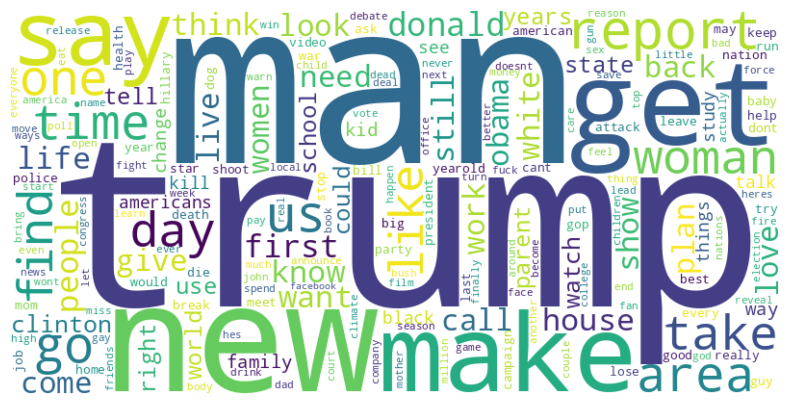

In [ ]:
word_scores = df_tfidf.sum().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Advaced Level (Optional for Basic Level)**

<style>
blue {
  color: skyblue;
}
</style>

## 3) **Encodings**

<blue>**Label Encoding -**</blue> I applied this to the is_sarcastic column. Since it's already 0s and 1s, the output looks the same, but this shows the process one would use if the column contained text labels like "yes" and "no".


<blue>**One-hot Encoding -**</blue> I then converted the single is_sarcastic column into a two-column matrix. A 0 becomes [1, 0] (representing the first category, "not sarcastic") and a 1 becomes [0, 1] (representing the second category, "sarcastic"). This is the standard format for feeding labels into many models, as it prevents any false sense of order.

In [ ]:
target_column = data['is_sarcastic']

# Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target_column)

print("Original Labels (first 10):", target_column.head(10).tolist())
print("Label Encoded (first 10):", integer_encoded[:10])


# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded_reshaped = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_reshaped)

print("\nOne-Hot Encoded Matrix (first 5 rows):")
print(onehot_encoded[:5])

Original Labels (first 10): [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
Label Encoded (first 10): [1 0 0 1 1 0 0 1 1 0]

One-Hot Encoded Matrix (first 5 rows):
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


<style>
blue {
  color: skyblue;
}
</style>

## 4) **Word Embeddings**

Word embeddings are <blue>**dense vector representations**</blue> of words that capture their meanings by placing words with <blue>**similar meanings closer**</blue> in <blue>**vector space**</blue>. Unlike BoW or one-hot encoding, embeddings <blue>**capture relationships**</blue> between words based on context. For example, in an embedding space, words like "king" and "queen" or "apple" and "fruit" would be closer together, reflecting their <blue>**semantic similarity**</blue>. These embeddings are learned from large datasets and can be used as inputs to machine learning models for various NLP tasks. Popular techniques for generating word embeddings include <blue>**Word2Vec**</blue>, <blue>**GloVe**</blue>, and <blue>**FastText**</blue>.

<style>
blue {
  color: skyblue;
}
</style>

## 5) **Word2Vec**

Word2Vec is a model used to <blue>**learn word embeddings**</blue>, developed by <blue>**Google**</blue>. It transforms words into <blue>**continuous vector representations**</blue> using neural networks. There are two primary approaches: <blue>**Skip-gram**</blue> and <blue>**Continuous Bag of Words (CBOW)**</blue>. Skip-gram <blue>**predicts surrounding words**</blue> given a <blue>**target word**</blue>, while CBOW <blue>**predicts**</blue> the <blue>**target word**</blue> based on its <blue>**context**</blue>. For example, in the sentence "The dog barked loudly", Skip-gram might learn that "dog" is likely to appear near words like "barked", while CBOW learns that "dog" fits between "The" and "barked". This method helps capture semantic relationships between words in a computationally efficient manner.



In [ ]:
sentences = data['tokenized'].dropna().tolist()

# CBOW Model
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0)

# Skip-gram Model
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=1)

print("--- Word2Vec Models Trained on Sarcasm Headlines ---")

# Example usage of the trained models
print("\nWords most similar to 'woman' (Skip-gram):")
print(skipgram_model.wv.most_similar('woman', topn=5))

print("\nSimilarity between 'man' and 'woman' (CBOW):")
print(cbow_model.wv.similarity('man', 'woman'))

--- Word2Vec Models Trained on Sarcasm Headlines ---

Words most similar to 'woman' (Skip-gram):
[('dad', 0.9578098654747009), ('man', 0.9515734314918518), ('mom', 0.9417113661766052), ('yearold', 0.9270703792572021), ('family', 0.9191066026687622)]

Similarity between 'man' and 'woman' (CBOW):
0.98133063
